In [1]:
import pandas as pd
df = pd.read_csv('spotify_dataset.csv', encoding='latin1') 
df = df[['text', 'emotion']]
df = df.drop_duplicates()
allowed_emotions = ['joy', 'sadness', 'anger', 'fear', 'love', 'surprise']
df = df[df['emotion'].isin(allowed_emotions)]
n = 4000
target_emotions = ['joy', 'sadness', 'anger', 'fear', 'love', 'surprise']
df = pd.concat([
    df[df['emotion'] == emotion].sample(n=n, random_state=42)
    for emotion in target_emotions
], ignore_index=True)

In [2]:
df.to_csv('spotify_cleaned.csv', index=False)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     24000 non-null  object
 1   emotion  24000 non-null  object
dtypes: object(2)
memory usage: 375.1+ KB


In [29]:
print(df['emotion'].unique())

['joy' 'sadness' 'anger' 'fear' 'love' 'surprise']


In [30]:
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder instance
le = LabelEncoder()

# Fit and transform the emotion column
df['emotion_encoded'] = le.fit_transform(df['emotion'])

# View the mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label mapping:", label_mapping)
df = df.drop(columns=['emotion'])
# Optional: view first few rows
print(df.head())


Label mapping: {'anger': np.int64(0), 'fear': np.int64(1), 'joy': np.int64(2), 'love': np.int64(3), 'sadness': np.int64(4), 'surprise': np.int64(5)}
                                                text  emotion_encoded
0  [Intro] The homie Young Bop told me He told me...                2
1  I spend too much time thinking about who I'm s...                2
2  [Verse 1] In his boat and through the dark he ...                2
3  [Intro: Mataya] Do you feel, feel Feel, feel D...                2
4  Plug Walk You know you ain't the plug, so how ...                2


In [9]:
encoded_df = pd.get_dummies(df, columns=['emotion'])

In [10]:
df.head()

,text,emotion,emotion_encoded
0,[Intro] The homie Young Bop told me He told me...,joy,2
1,I spend too much time thinking about who I'm s...,joy,2
2,[Verse 1] In his boat and through the dark he ...,joy,2
3,"[Intro: Mataya] Do you feel, feel Feel, feel D...",joy,2
4,"Plug Walk You know you ain't the plug, so how ...",joy,2


In [11]:
encoded_df.head()

,text,emotion_encoded,emotion_anger,emotion_fear,emotion_joy,emotion_love,emotion_sadness,emotion_surprise
0,[Intro] The homie Young Bop told me He told me...,2,False,False,True,False,False,False
1,I spend too much time thinking about who I'm s...,2,False,False,True,False,False,False
2,[Verse 1] In his boat and through the dark he ...,2,False,False,True,False,False,False
3,"[Intro: Mataya] Do you feel, feel Feel, feel D...",2,False,False,True,False,False,False
4,"Plug Walk You know you ain't the plug, so how ...",2,False,False,True,False,False,False


In [31]:
# Features (text column)
X = df['text']

# Labels (already label-encoded column)
y = df['emotion_encoded']

📊 Accuracy: 0.5310416666666666

🧾 Classification Report:
               precision    recall  f1-score   support

       anger       0.45      0.58      0.51       796
        fear       0.56      0.50      0.53       796
         joy       0.39      0.28      0.33       812
        love       0.57      0.64      0.60       799
     sadness       0.43      0.47      0.45       783
    surprise       0.81      0.71      0.76       814

    accuracy                           0.53      4800
   macro avg       0.53      0.53      0.53      4800
weighted avg       0.54      0.53      0.53      4800



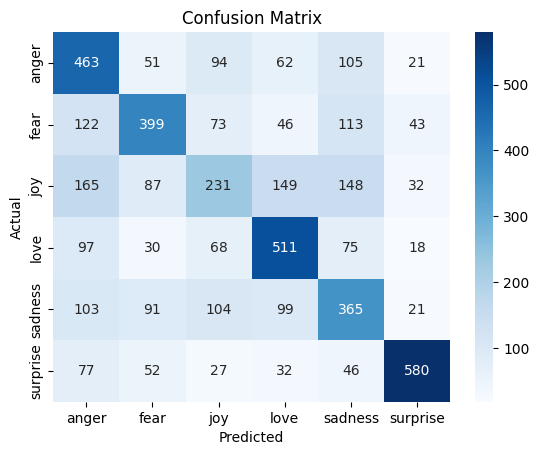

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split into train and test

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['emotion_encoded'], test_size=0.2, random_state=42)

# Convert text to TF-IDF vectors
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_tfidf, y_train)

# Predict on test set
y_pred = rf.predict(X_test_tfidf)

# Evaluation
print("📊 Accuracy:", accuracy_score(y_test, y_pred))
print("\n🧾 Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Optional: Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [14]:
X.head()

0    [Intro] The homie Young Bop told me He told me...
1    I spend too much time thinking about who I'm s...
2    [Verse 1] In his boat and through the dark he ...
3    [Intro: Mataya] Do you feel, feel Feel, feel D...
4    Plug Walk You know you ain't the plug, so how ...
Name: text, dtype: object

In [16]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: emotion_encoded, dtype: int64

In [19]:
print(df.columns)


Index(['text', 'emotion', 'emotion_encoded'], dtype='object')
